In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, confusion_matrix
import plotnine
from plotnine import ggplot, geom_point, aes, geom_line, geom_text, labs, xlab, ylab, theme_minimal

/Users/cyprien/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv('/Users/cyprien/Documents/KDD19-AnomRank-master/darpa_ffade.txt', sep=" ", names=['timestamp','source_ID','destination_ID', 'Label'])
data

,timestamp,source_ID,destination_ID,Label
0,1,1,2,0
1,1,1,2,0
2,6,3,4,0
3,6,3,4,0
4,7,2,1,0
...,...,...,...,...
4554339,87724,10,4,0
4554340,87724,10,4,0
4554341,87725,4,3,0
4554342,87725,4,10,0


In [3]:
#with open('result/score.txt', 'r') as f:
 #   lines = [line.strip('\n') for line in f.readlines()]


y_pred  = pd.read_csv('/Users/cyprien/Documents/KDD19-AnomRank-master/darpa_anomrank2.txt', sep=" ", names=['Score', 'Prediction'])
y_pred

,Score,Prediction
0,0.0000,0
1,0.0000,0
2,0.0000,0
3,0.0000,0
4,0.0000,0
...,...,...
77721,0.0000,0
77722,1266.8600,1
77723,0.0000,0
77724,39.9162,0


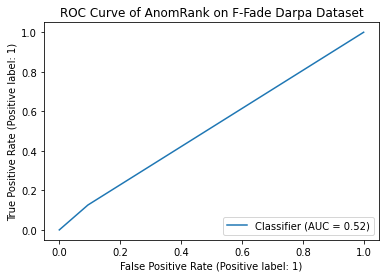

In [4]:
data_true=data[-len(y_pred):] #only select data that are predicted (after tsetup)
RocCurveDisplay.from_predictions(data_true['Label'], y_pred['Prediction'])
plt.title('ROC Curve of AnomRank on F-Fade Darpa Dataset')
#plt.plot([0,1], [0,1])
plt.show()

In [5]:
fpr, tpr, thresholds = roc_curve(data_true['Label'], y_pred['Prediction'], pos_label = 1)

Best Threshold: 1 with G-Mean: 0.3378
FPR: 0.094, TPR: 0.1259


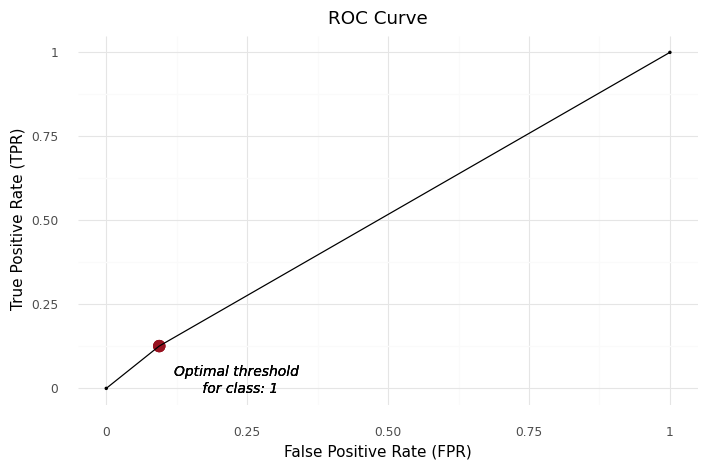

<ggplot: (8774211466674)>

In [6]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

In [7]:
data_true['Prediction'] = np.where(y_pred['Prediction']<3507.5758, 0, 1)

data_true['Prediction'].value_counts()

<ipython-input-7-fef5cc6facdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    77726
Name: Prediction, dtype: int64

In [8]:
confusion_matrix(data_true['Label'], data_true['Prediction'])

array([[49312,     0],
       [28414,     0]])

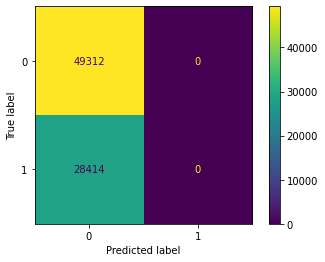

In [9]:
ConfusionMatrixDisplay.from_predictions(data_true['Label'], data_true['Prediction'])

In [10]:
TPR=2348710/(387504+2348710)
FPR=44787/(1594228+44787)
print(f'TPR {TPR}')
print(f'FPR {FPR}')

TPR 0.8583794980948127
FPR 0.027325558338392265


In [11]:
data_true['Label'].value_counts(normalize=True)

0    0.634434
1    0.365566
Name: Label, dtype: float64

In [12]:
data['Label'].value_counts(normalize=True)

1    0.601011
0    0.398989
Name: Label, dtype: float64

In [13]:
data_true['Prediction'].value_counts(normalize=True)

0    1.0
Name: Prediction, dtype: float64